In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm 
from scipy.stats import poisson

In [63]:
aerofit = pd.read_csv('/content/sample_data/aerofit_treadmill.csv')

In [64]:
aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


[Text(0, 0, '80'), Text(0, 0, '60'), Text(0, 0, '40')]

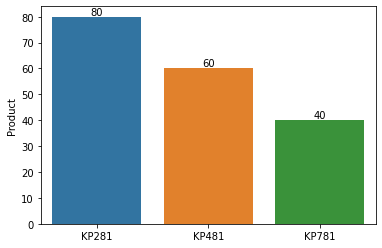

In [65]:
products_sold = sns.barplot(x=aerofit['Product'].value_counts().index,y=aerofit['Product'].value_counts())
products_sold.bar_label(products_sold.containers[0])

We observe that KP281 is the highest selling product followed by KP481 and KP781
# **Total Sales Amount 3.25M$**

 1. For 80 products of KP281 1.2M$

 2. For 60 products of KP480 1.05M$

 3. For 40 Products of KP781 1.0M$



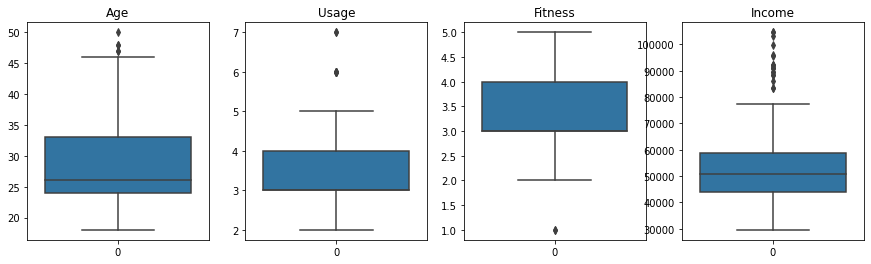

In [66]:
Columns_to_plot = ["Age","Usage","Fitness","Income"]
fig,axes = plt.subplots(1,4,figsize=(15,4))
for column,axis in zip(Columns_to_plot,axes):
  sns.boxplot(data=aerofit[column],ax=axis)
  axis.set_title(column)

# **Identifying Outliers among most important Attributes**


1.   Some customers are earning much more than other customers
2.   Some customers might be over planning the number of miles on treadmill compared to what overall customers are planning it. Similarly the same goes with Usage.
3.   It is recommended that those who could plan to use much more than others i.e., those outliers should be suggested an advanced machine to avoid machine tearout.



<Axes: xlabel='Product', ylabel='Income'>

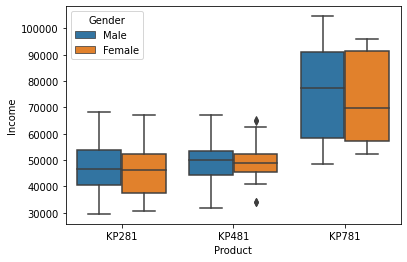

In [67]:
sns.boxplot(x=aerofit['Product'],y=aerofit['Income'],hue=aerofit['Gender'])


# Key Observations


1.   Customers with high salary are intended in buying KP781 treadmill
2.   Irrespective of the products bought males tend to have higher median of income than females.



<Axes: xlabel='Age', ylabel='Count'>

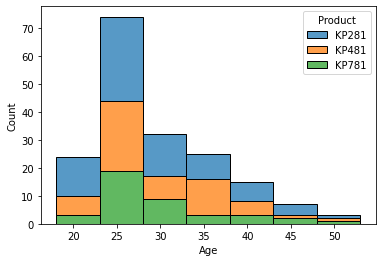

In [68]:
sns.histplot(x = aerofit['Age'],hue=aerofit['Product'],multiple="stack",binwidth=5)

Age could be a great consice step to fitness so we Understand that customers are mostly aged between 20-30.This can be further investigated to understand the product buying patterns since we don't really get enough patterns here.

<Axes: xlabel='Education', ylabel='Income'>

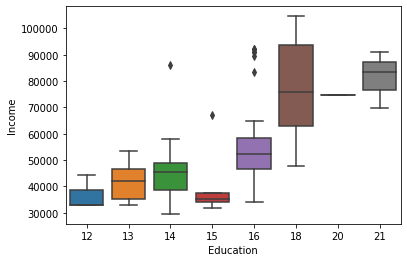

In [69]:
sns.boxplot(x=aerofit['Education'],y=aerofit['Income'])

We are trying to understand customers income in detailed. In which we are trying to interpret that customers with age above 16 are having high incomes compared to other ages which can be a factor of purchasing advanced featured Treadmill KPI781

In [70]:
gender_product = pd.crosstab(index=aerofit['Gender'],columns=aerofit['Product'],margins=True,normalize=True)
gender_product

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


# **Key Observation**


*   Total males who purchased tredmills among the list of customers is 57%
*   Total females who purchased treamills among the list of customers is 42%
*   We see that males and females equally bought the KP281 treadmill
*   Males are little more dominant in purchasing KP481 compared to females
*   Males are much more dominant in buying KP781 compared to females




In [71]:
aerofit_female = aerofit.loc[aerofit['Gender']=='Female']
aerofit_female

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
2,KP281,19,Female,14,Partnered,4,3,30699,66
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
9,KP281,21,Female,15,Partnered,2,3,37521,85
11,KP281,22,Female,14,Partnered,3,2,35247,66
...,...,...,...,...,...,...,...,...,...
152,KP781,25,Female,18,Partnered,5,5,61006,200
157,KP781,26,Female,21,Single,4,3,69721,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
167,KP781,30,Female,16,Partnered,6,5,90886,280


Filtering out only female customers and understanding their purchases in depth

In [72]:
aerofit_female.groupby(['Product','Education'])['Income'].mean()

Product  Education
KP281    14           43079.666667
         15           35815.500000
         16           48771.315789
         18           67083.000000
KP481    13           46617.000000
         14           44722.000000
         16           52464.428571
         18           56487.000000
KP781    16           71588.500000
         18           75634.750000
         21           69721.000000
Name: Income, dtype: float64

We clearly see that KP781 which is advanced treadmill is bought by only those females whose average income is high and also from the previous observation we understand that customers above age 16 and above tend to have more income compared to other ages which can be further understood by buying behaviour here.

In [73]:
aerofit_male = aerofit.loc[aerofit['Gender']=='Male']
aerofit_male

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
7,KP281,21,Male,13,Single,3,3,32973,85
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [74]:
aerofit_male.groupby(['Product','Education'])['Income'].mean()

Product  Education
KP281    12           38658.000000
         13           36763.000000
         14           46901.250000
         15           33541.500000
         16           49345.800000
         18           68220.000000
KP481    12           32973.000000
         13           53439.000000
         14           41448.818182
         15           67083.000000
         16           52837.058824
KP781    14           67282.000000
         16           69050.615385
         18           81400.066667
         20           74701.000000
         21           87151.000000
Name: Income, dtype: float64

We clearly see that the basic treadmill is being purchased by all the age groups and the one with advanced features is only being purchased by high income age groups.

[Text(0, 0, '3.275'), Text(0, 0, '3'), Text(0, 0, '4.72727')]

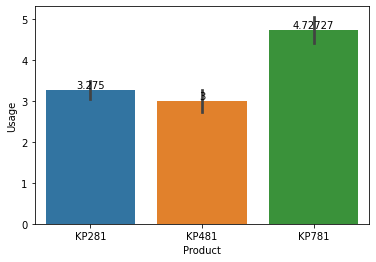

In [75]:
avg_usage_male = sns.barplot(x=aerofit_male['Product'],y=aerofit_male['Usage'],estimator='mean')
avg_usage_male.bar_label(avg_usage_male.containers[0])

# **Key Facts**


1.   Males who bought KP781 have planned more average usage per week among all the types of treadmills
2.   Intrestingly we see that the basic treadmill KP281 has got little more avergae usage compared to KP481



[Text(0, 0, '89.375'), Text(0, 0, '88.4839'), Text(0, 0, '164.121')]

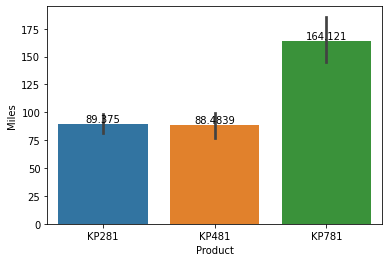

In [76]:
avg_miles_male = sns.barplot(x=aerofit_male['Product'],y=aerofit_male['Miles'],estimator='mean')
avg_miles_male.bar_label(avg_miles_male.containers[0])

[Text(0, 0, '2.9'), Text(0, 0, '3.13793'), Text(0, 0, '5')]

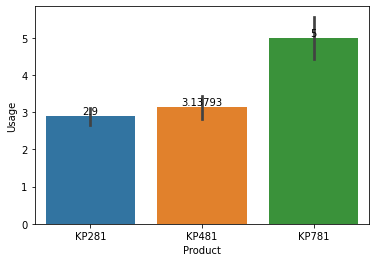

In [77]:
avg_usage_female = sns.barplot(x=aerofit_female['Product'],y=aerofit_female['Usage'],estimator='mean')
avg_usage_female.bar_label(avg_usage_female.containers[0])

# **KeyFacts**


1.   Females who purchased KP781 has planned the highest average number of miles per week and avg usage per week
2.   We can influence this fact of planning high miles per week with intermediate level treadmill and upsell it to those females who purchased KP281.



[Text(0, 0, '76.2'), Text(0, 0, '87.3448'), Text(0, 0, '180')]

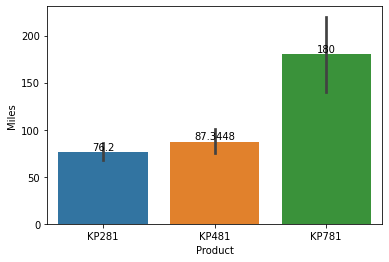

In [78]:
avg_miles_female = sns.barplot(x=aerofit_female['Product'],y=aerofit_female['Miles'],estimator='mean')
avg_miles_female.bar_label(avg_miles_female.containers[0])

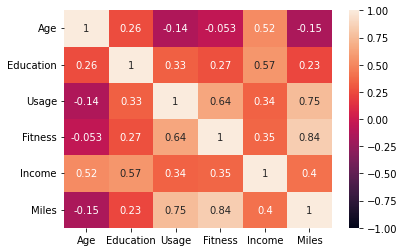

In [79]:
heatmap_females = sns.heatmap(aerofit_female.corr(),vmin=-1,vmax=1,annot=True)

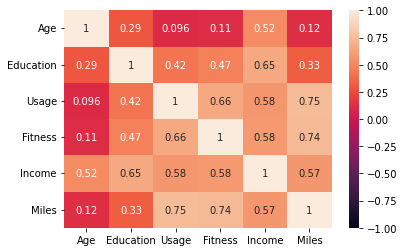

In [80]:
heatmap_males = sns.heatmap(aerofit_male.corr(),vmin=-1,vmax=1,annot=True)

# **Valuable Correlation**
*Mens income can indirectly effect the class of treadmill they buy. Like those who earn more income are more aged and also they are not intended to plan for more usage or miles in a week*

In [81]:
aerofit_female.Income.describe()

count       76.000000
mean     49828.907895
std      12557.690428
min      30699.000000
25%      42921.750000
50%      47754.000000
75%      53796.000000
max      95866.000000
Name: Income, dtype: float64

In [82]:
aerofit_female.Age.describe()

count    76.000000
mean     28.565789
std       6.342104
min      19.000000
25%      24.000000
50%      26.500000
75%      33.000000
max      50.000000
Name: Age, dtype: float64

In [83]:
aerofit_female

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
2,KP281,19,Female,14,Partnered,4,3,30699,66
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
9,KP281,21,Female,15,Partnered,2,3,37521,85
11,KP281,22,Female,14,Partnered,3,2,35247,66
...,...,...,...,...,...,...,...,...,...
152,KP781,25,Female,18,Partnered,5,5,61006,200
157,KP781,26,Female,21,Single,4,3,69721,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
167,KP781,30,Female,16,Partnered,6,5,90886,280


In [84]:
female_buying_prob1 = pd.crosstab(index=aerofit_female['Product'],columns=aerofit_female['MaritalStatus'],margins=True)
female_buying_prob1

MaritalStatus,Partnered,Single,All
Product,,,
KP281,27,13,40
KP481,15,14,29
KP781,4,3,7
All,46,30,76


# **Key Facts**

**Probability of females buying different products**


*   The probability of buying **KP281 52.6%**
*   The probability of buying **KP481 41.4%**
*   The probability of buying **KP781 9.2%**


**Probability of female with Single Status Buying following products**

*   The probability of buying **KP281 43.3%**
*   The probability of buying **KP481 46.6%**
*   The probability of buying **KP781 10.0%**

**Probability of female with Partnered Status buying following products**


*   The probability of buying **KP281 58.6%**
*   The probability of buying **KP481 32.6%**
*   The probability of buying **KP781 8.6%**










In [85]:
Male_buying_prob1 = pd.crosstab(index=aerofit_male['Product'],columns=aerofit_male['MaritalStatus'],margins=True)
Male_buying_prob1

MaritalStatus,Partnered,Single,All
Product,,,
KP281,21,19,40
KP481,21,10,31
KP781,19,14,33
All,61,43,104


# **Key Facts**

**Probability of males buying different products**


*   The probability of buying **KP281 38.4%**
*   The probability of buying **KP481 29.8%**
*   The probability of buying **KP781 13.4%**


**Probability of male with Single Status Buying following products**

*   The probability of buying **KP281 44.1%**
*   The probability of buying **KP481 23.2%**
*   The probability of buying **KP781 32.5%**

**Probability of male with Partnered Status buying following products**


*   The probability of buying **KP281 34.4%**
*   The probability of buying **KP481 34.4%**
*   The probability of buying **KP781 31.1%**










In [86]:
pd.qcut(aerofit_female['Income'],q=4,labels=["I","II","III","IV"],retbins=True)

(2       I
 5       I
 6       I
 9       I
 11      I
        ..
 152    IV
 157    IV
 162    IV
 167    IV
 171    IV
 Name: Income, Length: 76, dtype: category
 Categories (4, object): ['I' < 'II' < 'III' < 'IV'],
 array([30699.  , 42921.75, 47754.  , 53796.  , 95866.  ]))

# **We have just made bins of the income using pd.qcut function to get more relation between the income and product purchased**

**We have created four BINS which go this way I,II,III,IV where I<II<II<III<IV and the values as shown below [30699.  , 42921.75, 47754.  , 53796.  , 95866.  ]**


In [87]:
female_income_BIN_1 = aerofit_female.loc[aerofit_female['Income']<= 42921.75]
female_income_BIN_1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
2,KP281,19,Female,14,Partnered,4,3,30699,66
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
9,KP281,21,Female,15,Partnered,2,3,37521,85
11,KP281,22,Female,14,Partnered,3,2,35247,66
12,KP281,22,Female,16,Single,4,3,36384,75
13,KP281,22,Female,14,Single,3,3,35247,75
16,KP281,23,Female,14,Single,2,3,34110,103
18,KP281,23,Female,16,Single,4,3,38658,113
19,KP281,23,Female,15,Partnered,2,2,34110,38


In [88]:
Female_income_bin1 = pd.crosstab(index=female_income_BIN_1['Product'],columns=female_income_BIN_1['MaritalStatus'],margins=True,normalize='index')
Female_income_bin1

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.500000,0.500000
All,0.578947,0.421053


# **Interesting Fact-1**
** Females with Income <= 40932$ has

1.   The probability of buying KP281 40% for Singles and 60% for Partnered
2.   The probability of buying KP481 50% for Singles and 50% for Partnered
3.   **This income group (<=40932$) are not even showing interest to buy the advanced treadmill KP781 at all. So investing on marketing to this group of customers is not needed.**



In [89]:
female_income_BIN_2 = aerofit_female.loc[(aerofit_female['Income']>=40932) & (aerofit_female['Income']<= 47754.75) ]
female_income_BIN_2

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
22,KP281,24,Female,16,Single,4,3,42069,94
23,KP281,24,Female,16,Partnered,5,5,44343,188
26,KP281,24,Female,16,Single,4,3,46617,75
32,KP281,25,Female,16,Partnered,2,2,40932,47
34,KP281,26,Female,14,Partnered,3,4,44343,113
41,KP281,27,Female,14,Partnered,3,2,45480,66
43,KP281,27,Female,14,Partnered,2,3,45480,56
44,KP281,28,Female,14,Partnered,2,3,46617,56
51,KP281,29,Female,14,Partnered,2,2,46617,38
56,KP281,31,Female,14,Single,2,2,45480,47


In [90]:
Female_income_bin2 = pd.crosstab(index=female_income_BIN_2['Product'],columns=female_income_BIN_2['MaritalStatus'],margins=True,normalize='index')
Female_income_bin2

MaritalStatus,Partnered,Single
Product,,
KP281,0.666667,0.333333
KP481,0.333333,0.666667
All,0.500000,0.500000


# **Interesting Fact-2**
** Females with Income > 40932 $ and <= 47754$* has

1.   The probability of buying KP281 33.3 % for Singles and 66.6% for Partnered
2.   The probability of buying KP481 66.6 % for Singles and 33.3 % for Partnered
3.   **This income group (<=40932$) are not even showing interest to buy the advanced treadmill KP781 at all. So investing on marketing to this group of customers is not needed.**



In [91]:
female_income_BIN_3 = aerofit_female.loc[(aerofit_female['Income']>47754) & (aerofit_female['Income']<= 53797) ]
female_income_BIN_3

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
27,KP281,25,Female,14,Partnered,3,3,48891,75
29,KP281,25,Female,14,Partnered,2,2,53439,47
35,KP281,26,Female,16,Partnered,4,3,52302,113
45,KP281,28,Female,16,Partnered,2,3,52302,66
49,KP281,28,Female,16,Partnered,3,3,51165,56
52,KP281,29,Female,16,Partnered,4,3,50028,94
62,KP281,34,Female,16,Single,2,2,52302,66
96,KP481,24,Female,16,Single,3,3,50028,106
109,KP481,26,Female,16,Single,4,4,50028,127
112,KP481,29,Female,14,Partnered,3,3,51165,95


In [92]:
Female_income_bin3 = pd.crosstab(index=female_income_BIN_3['Product'],columns=female_income_BIN_3['MaritalStatus'],margins=True)
Female_income_bin3

MaritalStatus,Partnered,Single,All
Product,,,
KP281,6,1,7
KP481,6,3,9
KP781,0,2,2
All,12,6,18


# **Interesting Fact-3**
** Females with Income >47754$ and <=53797$* has

1.   The probability of buying KP281 14.2 % for Singles and .85.7% for Partnered
2.   The probability of buying KP481 33.3 % for Singles and 66.6 % for Partnered
3.   **This income group has 33.3% of total singles who are buying KP781 but 0% of the total Partners **



In [93]:
female_income_BIN_4 = aerofit_female.loc[(aerofit_female['Income']>52291) ]
female_income_BIN_4

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
29,KP281,25,Female,14,Partnered,2,2,53439,47
35,KP281,26,Female,16,Partnered,4,3,52302,113
45,KP281,28,Female,16,Partnered,2,3,52302,66
47,KP281,28,Female,14,Partnered,3,3,54576,94
59,KP281,33,Female,16,Single,2,2,55713,38
62,KP281,34,Female,16,Single,2,2,52302,66
64,KP281,35,Female,16,Partnered,3,3,60261,94
65,KP281,35,Female,18,Single,3,3,67083,85
69,KP281,38,Female,14,Partnered,2,3,54576,56
76,KP281,44,Female,16,Single,3,4,57987,75


In [94]:
Female_income_bin4 = pd.crosstab(index=female_income_BIN_4['Product'],columns=female_income_BIN_4['MaritalStatus'],margins=True,normalize='index')
Female_income_bin4

MaritalStatus,Partnered,Single
Product,,
KP281,0.666667,0.333333
KP481,0.625000,0.375000
KP781,0.666667,0.333333
All,0.653846,0.346154


# **Interesting Fact-4**
** Females with Income >52291$ has

1.   The probability of buying KP281 33.3 % for Singles and .66.6% for Partnered
2.   The probability of buying KP481 37.5 % for Singles and 62.5 % for Partnered
3.   **This is the only income group where the probability of buying KP781 which is advanced treadmill with 33.3% of singles buying it and 66.6% of partnered buying**



In [95]:
pd.qcut(aerofit_male['Income'],q=4,labels=["I","II","III","IV"],retbins=True)

(0       I
 1       I
 3       I
 4       I
 7       I
        ..
 175    IV
 176    IV
 177    IV
 178    IV
 179    IV
 Name: Income, Length: 104, dtype: category
 Categories (4, object): ['I' < 'II' < 'III' < 'IV'],
 array([ 29562.  ,  45480.  ,  52302.  ,  61611.25, 104581.  ]))

In [96]:
male_income_BIN_1 = aerofit_male.loc[aerofit_male['Income']<= 45480]
male_income_BIN_1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
10,KP281,22,Male,14,Single,3,3,36384,85
14,KP281,23,Male,16,Partnered,3,1,38658,47
15,KP281,23,Male,16,Partnered,3,3,40932,75
17,KP281,23,Male,16,Partnered,4,3,39795,94


In [97]:
male_income_bin1 = pd.crosstab(index=male_income_BIN_1['Product'],columns=male_income_BIN_1['MaritalStatus'],margins=True,normalize='index')
male_income_bin1

MaritalStatus,Partnered,Single
Product,,
KP281,0.368421,0.631579
KP481,0.615385,0.384615
All,0.468750,0.531250


# **Interesting Fact in Male Customers -1**
**Males with Income >45480$ has** 

1.   The probability of buying KP281 63.1 % for Singles and .36.8% for Partnered
2.   The probability of buying KP481 38.4 % for Singles and 61.5 % for Partnered
3.   **This income group has 0% of both singles and parterned who are buying KP781. So investing on marketing to this group of customers is not needed.**



In [98]:
male_income_BIN_2 = aerofit_male.loc[(aerofit_male['Income']>45480) & (aerofit_male['Income']<= 52302) ]
male_income_BIN_2

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
37,KP281,26,Male,16,Partnered,3,3,51165,85
40,KP281,26,Male,16,Single,3,3,50028,85
46,KP281,28,Male,14,Single,3,3,52302,103
53,KP281,30,Male,14,Partnered,4,4,46617,141
58,KP281,32,Male,14,Partnered,4,3,52302,85
61,KP281,34,Male,16,Single,4,5,51165,169
63,KP281,35,Male,16,Partnered,4,3,48891,85
68,KP281,38,Male,16,Partnered,3,3,46617,75
70,KP281,38,Male,14,Single,2,3,52302,56
95,KP481,24,Male,14,Single,3,4,48891,106


In [99]:
male_income_bin2 = pd.crosstab(index=male_income_BIN_2['Product'],columns=male_income_BIN_2['MaritalStatus'],margins=True,normalize='index')
male_income_bin2

MaritalStatus,Partnered,Single
Product,,
KP281,0.555556,0.444444
KP481,0.571429,0.428571
KP781,0.166667,0.833333
All,0.454545,0.545455


# **Interesting Fact in Male Customers -2**
**Males with Income >45480$ and <52302 has** 

1.   The probability of buying KP281 44.4 % for Singles and .55.5% for Partnered
2.   The probability of buying KP481 42.9 % for Singles and 57.1 % for Partnered
3.   The probability of buying KP781 83.3% for singles and 16.6% for Partnered

In [100]:
male_income_BIN_3 = aerofit_male.loc[(aerofit_male['Income']>52302) & (aerofit_male['Income']<= 61611) ]
male_income_BIN_3

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
36,KP281,26,Male,16,Partnered,2,2,53439,47
42,KP281,27,Male,16,Single,4,3,54576,85
48,KP281,28,Male,14,Single,4,3,54576,113
54,KP281,30,Male,14,Single,3,3,54576,85
55,KP281,31,Male,14,Partnered,2,2,54576,47
71,KP281,38,Male,16,Partnered,3,3,56850,75
72,KP281,39,Male,16,Partnered,4,4,59124,132
73,KP281,40,Male,16,Partnered,3,3,61398,66
74,KP281,41,Male,16,Partnered,4,3,54576,103
75,KP281,43,Male,16,Partnered,3,3,53439,66


In [101]:
male_income_bin3 = pd.crosstab(index=male_income_BIN_3['Product'],columns=male_income_BIN_3['MaritalStatus'],margins=True,normalize='index')
male_income_bin3

MaritalStatus,Partnered,Single
Product,,
KP281,0.727273,0.272727
KP481,0.888889,0.111111
KP781,0.250000,0.750000
All,0.708333,0.291667


# **Interesting Fact in Male Customers -3**
**Males with Income >52302$ and <61611 has** 

1.   The probability of buying KP281 27.2 % for Singles and .72.2% for Partnered
2.   The probability of buying KP481 11.1 % for Singles and 88.8 % for Partnered
3.   The probability of buying KP781 75.0% for singles and 25.0% for Partnered

In [102]:
male_income_BIN_4 = aerofit_male.loc[(aerofit_male['Income']>61611) ]
male_income_BIN_4

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
50,KP281,29,Male,18,Partnered,3,3,68220,85
127,KP481,34,Male,15,Single,3,3,67083,85
137,KP481,40,Male,16,Partnered,3,3,64809,95
151,KP781,25,Male,16,Partnered,4,4,62251,160
153,KP781,25,Male,18,Partnered,4,3,64741,100
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
156,KP781,25,Male,20,Partnered,4,5,74701,170
158,KP781,26,Male,16,Partnered,5,4,64741,180
159,KP781,27,Male,16,Partnered,4,5,83416,160


In [103]:
male_income_bin4 = pd.crosstab(index=male_income_BIN_4['Product'],columns=male_income_BIN_4['MaritalStatus'],margins=True,normalize='index')
male_income_bin4

MaritalStatus,Partnered,Single
Product,,
KP281,1.000000,0.000000
KP481,0.500000,0.500000
KP781,0.739130,0.260870
All,0.730769,0.269231


# **Interesting Fact in Male Customers -4**
**Males with Income >61611$ has** 

1.   **This group of customers has 0% probabity of buying the basic treadmill.Its not adviced to market about that product to this group of customers**
2.   The probability of buying KP481 50.0 % for Singles and 50.0 % for Partnered
3.   The probability of buying KP781 26.1% for singles and 73.9% for Partnered